### Adding columns to the youtube trending dataset
Columns to add
- previous video(s)
    - ~count~
    - ~views~
    - ~likes~
    - ~dislikes~
    - ~previous days on trending~
    - quantiles of the above
    - aggregates of the above
- ~Subscriber count? is that possible?~ Not possible without a bunch more work
- ~days since release~
- ~days since published~
- ~time of day published (GMT)~
    - ~from 0-24~
    - ~from 0-1~
    - ~morning, afternoon, evening, night~
- ~time of day published (local)~
    - ~from 0-24~
    - ~from 0-1~
    - ~morning, afternoon, evening, night~
- ~day of week, published~
- ~day of week, current day~
- ~holiday (US, should probably include others too)~
- ~time of day (local time)~
- ~weekend indicator~
- avg previous like/dislikes, ratio, comments
- a target variable: if video stays on trending (boolean)
- How many countries have they previously been trending?
- Number of trending videos in the past year
- Average likes/comments/whatever in the past year

Questions:
- What proportion have been on trending before?
- What is the distribution of views after n days over time (recent, growth)
- How many days do videos stay on trending?
- Can we predict if a video will stay an additional day on trending?
- should we truncate the beginning of the data so that we have the first day of every single video?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import holidays
from scipy.stats import gmean

In [21]:
us_df = pd.read_csv("../data/US_youtube_trending_data_cleaned.csv")
us_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,view_count_scaled,likes_scaled,dislikes_scaled
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS http://bit.ly/Subscribe...,-0.137208,0.063873,0.528205
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands The ...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,"['Apex Legends', 'Apex Legends characters', 'n...",2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",-0.028025,0.039972,0.172928
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,"['jacksepticeye', 'funny', 'funny meme', 'meme...",2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,-0.071195,0.526618,0.153661
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,"['xxl freshman', 'xxl freshmen', '2020 xxl fre...",496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL http://bit.ly/subscribe-xxl ...,-0.265375,-0.250275,0.064058
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,"['The LaBrant Family', 'DIY', 'Interior Design...",1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,-0.186408,-0.197271,-0.039473


Text(0.5, 1.0, 'Histogram of number of days a video stays on trending, US')

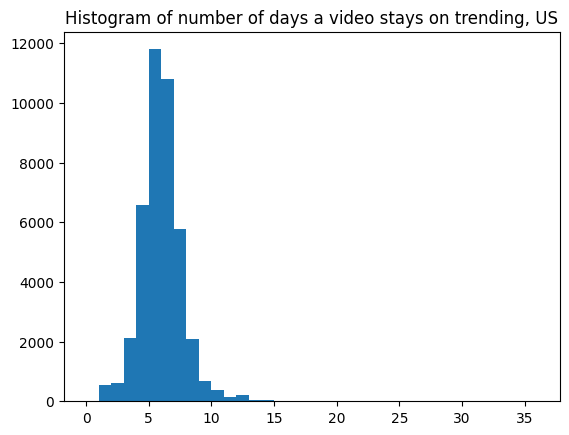

In [3]:
plt.hist(us_df['video_id'].value_counts(), bins=np.arange(0, 37, 1))
plt.title("Histogram of number of days a video stays on trending, US")

In [4]:
us_df['video_id'].value_counts()

video_id
J_z-W4UVHkw    36
hdmx71UjBXs    36
yhB3BgJyGl8    35
KrLj6nc516A    35
aONT7atzqfw    35
               ..
Cz32lhOGyec     1
MVKOkHGZjoo     1
84jTH3te8U0     1
xzpwHwOEbBs     1
LmdWP-_IuIs     1
Name: count, Length: 41987, dtype: int64

In [5]:
print(us_df.loc[us_df['video_id'] == 'J_z-W4UVHkw', 'title'].iloc[0])
print(us_df.loc[us_df['video_id'] == 'J_z-W4UVHkw', 'channelTitle'].iloc[0])

Every Country On Earth Fights For $250,000!
MrBeast


In [19]:
#siNiNT0qbI8
print(us_df.loc[us_df['video_id'] == 'siNiNT0qbI8', 'title'].iloc[0])
print(us_df.loc[us_df['video_id'] == 'siNiNT0qbI8', 'channelTitle'].iloc[0])
us_df.loc[us_df['video_id'] == 'siNiNT0qbI8', 'description']

FC Juarez 1 - 2 Chivas | HIGHLIGHTS | Liga MX J4 | Clausura 2023
Fox Deportes


181855    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
181856    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
181857    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
181858    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
181859    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
Name: description, dtype: object

In [6]:
def add_days_on_trending(df, video_id_col='video_id', trending_date_col='trending_date'):
    # Written by GPT-4
    # Ensure the trending_date column is in datetime format
    df[trending_date_col] = pd.to_datetime(df[trending_date_col])

    # Get the earliest trending date for each video
    earliest_trending = df.groupby(video_id_col)[trending_date_col].min().reset_index()
    earliest_trending.columns = [video_id_col, 'earliest_trending_date']

    # Merge the earliest trending date back into the original dataframe
    df = df.merge(earliest_trending, on=video_id_col)

    # Calculate the number of days since the earliest trending date for each video
    df['days_on_trending'] = (df[trending_date_col] - df['earliest_trending_date']).dt.days + 1

    # Drop the 'earliest_trending_date' as it's no longer needed in the final DataFrame
    df = df.drop(columns=['earliest_trending_date'])

    return df
    
def add_days_since_published(df, video_id_col='video_id', trending_date_col='trending_date', publishedAt_col='publishedAt'):
    # Ensure the trending_date column is in datetime format
    df[trending_date_col] = pd.to_datetime(df[trending_date_col])
    df[publishedAt_col] = pd.to_datetime(df[publishedAt_col])
    df['days_since_published'] = (df[trending_date_col] - df[publishedAt_col]).dt.days
    return df

#For some reason earliest_trending_date isn't working
# def add_days_to_make_to_trending(df, earliest_trending_date_col='earliest_trending_date', publishedAt_col='publishedAt'):
#     df['days_to_make_to_trending'] = df[earliest_trending_date_col] - df[publishedAt_col]
#     return df

def add_time_of_day_variables(df, output_column_modifier="", published_at_col='publishedAt'):
    #Written by GPT-4
    # Ensure the publishedAt column is in datetime format
    df[published_at_col] = pd.to_datetime(df[published_at_col])
    # Extract the hour of day (0-23)
    df[output_column_modifier+'hour_of_day_published'] = df[published_at_col].dt.hour
    # Normalize the hour of day (0-1)
    df[output_column_modifier+'hour_published_normalized'] = df[output_column_modifier+'hour_of_day_published'] / 24
    # Categorize the time of day
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'
    df[output_column_modifier+'time_of_day_published'] = df[output_column_modifier+'hour_of_day_published'].apply(get_time_of_day)
    return df

def add_day_of_week(df, published_at_col='publishedAt', trending_date_col='trending_date'):
    #Written by GPT-4
    # Ensure the columns are in datetime format
    df[published_at_col] = pd.to_datetime(df[published_at_col])
    df[trending_date_col] = pd.to_datetime(df[trending_date_col])
    # Get the day name for the published day
    df['day_of_week_published'] = df[published_at_col].dt.day_name()
    # Get the day name for the trending day
    df['trending_day_of_week'] = df[trending_date_col].dt.day_name()
    return df

def add_is_weekend(df, day_of_week_published_col='day_of_week_published', trending_day_of_week_col='trending_day_of_week'):
    df["is_weekend_published"] = (df[day_of_week_published_col] == 'Saturday') | (df[day_of_week_published_col] == 'Sunday')
    df["is_weekend_trending"] = (df[trending_day_of_week_col] == 'Saturday') | (df[trending_day_of_week_col] == 'Sunday')
    return df

def add_local_time_of_day(df, published_at_col='publishedAt', timezone_str='UTC'):
    #Written by GPT-4
    # Check if the publishedAt column is already timezone-aware
    if df[published_at_col].dt.tz is None:
        # If not timezone-aware, localize to UTC
        df[published_at_col] = pd.to_datetime(df[published_at_col]).dt.tz_localize('UTC')
    else:
        # If timezone-aware, ensure it is UTC to standardize before conversion
        df[published_at_col] = df[published_at_col].dt.tz_convert('UTC')
    # Convert to the desired timezone
    local_timezone = pytz.timezone(timezone_str)
    df['local_time_of_day_published'] = df[published_at_col].dt.tz_convert(local_timezone)
    # Optionally, extract the local time from the timestamp if needed (e.g., HH:MM format)
    # df['local_time_of_day_published'] = df['local_time_of_day_published'].dt.strftime('%H:%M')
    return df

def add_US_holiday_column(df, published_at_col='publishedAt'):
    # Ensure the publishedAt column is in datetime format
    df[published_at_col] = pd.to_datetime(df[published_at_col])
    # Create an instance of the US holidays
    us_holidays = holidays.UnitedStates()
    # Determine if the publish date is a holiday in the US
    df['published_on_holiday'] = df[published_at_col].apply(lambda x: x in us_holidays)
    return df

us_df = add_days_on_trending(us_df)
us_df = add_days_since_published(us_df)
us_df = add_time_of_day_variables(us_df)
us_df = add_day_of_week(us_df)
us_df = add_is_weekend(us_df)
us_df = add_local_time_of_day(us_df, timezone_str='America/New_York')
us_df = add_time_of_day_variables(us_df, output_column_modifier="local_", published_at_col='local_time_of_day_published')
us_df = add_US_holiday_column(us_df)

us_df.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,hour_published_normalized,time_of_day_published,day_of_week_published,trending_day_of_week,is_weekend_published,is_weekend_trending,local_time_of_day_published,local_hour_of_day_published,local_hour_published_normalized,published_on_holiday
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614,156908,...,0.791667,evening,Tuesday,Wednesday,False,False,afternoon,15,0.625000,False
1,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",3017834,183592,...,0.791667,evening,Tuesday,Thursday,False,False,afternoon,15,0.625000,False
2,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-14 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",3721729,195344,...,0.791667,evening,Tuesday,Friday,False,False,afternoon,15,0.625000,False
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-15 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",3853404,200215,...,0.791667,evening,Tuesday,Saturday,False,True,afternoon,15,0.625000,False
4,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-16 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",3898795,201808,...,0.791667,evening,Tuesday,Sunday,False,True,afternoon,15,0.625000,False
5,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-17 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",3929527,203054,...,0.791667,evening,Tuesday,Monday,False,False,afternoon,15,0.625000,False
6,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-18 00:00:00+00:00,"['brawadis', 'prank', 'basketball', 'skits', '...",3958226,204260,...,0.791667,evening,Tuesday,Tuesday,False,False,afternoon,15,0.625000,False
7,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands The ...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,"['Apex Legends', 'Apex Legends characters', 'n...",2381688,146739,...,0.708333,evening,Tuesday,Wednesday,False,False,afternoon,13,0.541667,False
8,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands The ...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-13 00:00:00+00:00,"['Apex Legends', 'Apex Legends characters', 'n...",2932421,153682,...,0.708333,evening,Tuesday,Thursday,False,False,afternoon,13,0.541667,False
9,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands The ...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-15 00:00:00+00:00,"['Apex Legends', 'Apex Legends characters', 'n...",3312231,160542,...,0.708333,evening,Tuesday,Saturday,False,True,afternoon,13,0.541667,False


In [7]:
#it may worth picking just specific "thematic" holidays - christmas, halloween, thanksgiving, 4th of july
us_df[us_df['published_on_holiday']].sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,hour_published_normalized,time_of_day_published,day_of_week_published,trending_day_of_week,is_weekend_published,is_weekend_trending,local_time_of_day_published,local_hour_of_day_published,local_hour_published_normalized,published_on_holiday
136760,Ul_LSTpBVVA,Overpowered Weapons vs Custom Bosses in Minecraft,2022-06-19 15:30:03+00:00,UC_cvTMeip9po2hZdF3aBXrA,BeckBroJack,20,2022-06-23 00:00:00+00:00,"['minecraft', 'custom bosses', 'minecraft boss...",631211,50164,...,0.625000,afternoon,Sunday,Thursday,True,False,morning,11,0.458333,True
224898,TyulGR2dOy4,It got WAY WORSE - Burning Man 2023 Rain Updat...,2023-09-04 16:16:45+00:00,UC4SXMZsFPZMFN5-3UuF-k6w,Trent Palmer,2,2023-09-10 00:00:00+00:00,"['trent palmer', 'bush plane', 'bush pilot', '...",1024960,30802,...,0.666667,afternoon,Monday,Sunday,False,True,afternoon,12,0.500000,True
224924,rg8pCyrZYaA,Marvel Studios Loki Season 2 | October 6 on Di...,2023-09-04 16:00:27+00:00,UCvC4D8onUfXzvjTOM-dBfEA,Marvel Entertainment,24,2023-09-12 00:00:00+00:00,"['marvel', 'comics']",3611462,107283,...,0.666667,afternoon,Monday,Tuesday,False,False,afternoon,12,0.500000,True
18987,OwC_28hDvzg,Roblox Presents: The Lil Nas X Concert Experience,2020-11-11 00:42:25+00:00,UC_uMv3bNXwapHl8Dzf2p01Q,Lil Nas X,10,2020-11-17 00:00:00+00:00,NaN,697762,42855,...,0.000000,night,Wednesday,Tuesday,False,False,evening,19,0.791667,True
136715,YEUbZUTHYdo,Empires SMP : The Musical,2022-06-19 13:00:09+00:00,UCzTlXb7ivVzuFlugVCv3Kvg,LDShadowLady,20,2022-06-20 00:00:00+00:00,"['ldshadowlady', 'minecraft', 'mini game', 'gi...",741448,92608,...,0.541667,afternoon,Sunday,Monday,True,False,morning,9,0.375000,True


<BarContainer object of 7 artists>

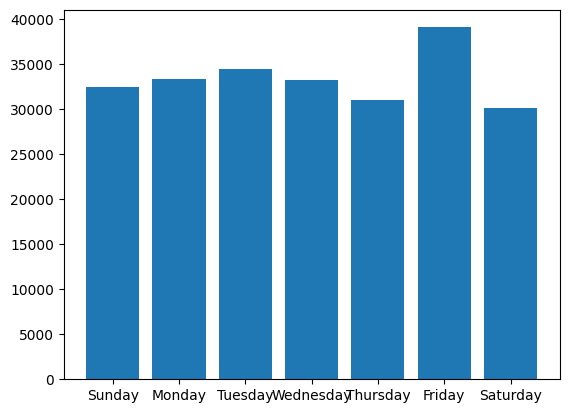

In [8]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_of_week_published_count = us_df['day_of_week_published'].value_counts()[days]
plt.bar(x=days, height=day_of_week_published_count)

In [9]:
#Roughly the percent of videos that don't trend on their first day - check this more in-depth
sum(us_df['days_on_trending'] != us_df['days_since_published'])/len(us_df)

0.6438638589827492

In [10]:
import datetime as dt

In [11]:
us_df['trending_date'].min() - dt.timedelta(days=365)

Timestamp('2019-08-13 00:00:00+0000', tz='UTC')

In [12]:
def calculate_channel_statistics(df):
    #Partially written by GPT-4
    # Convert 'publishedAt' to datetime if it's not already
    df['publishedAt'] = pd.to_datetime(df['publishedAt'])
    # Sort the DataFrame by channelID and publishedAt to ensure chronological order
    df.sort_values(by=['channelId', 'publishedAt'], ascending=True, inplace=True)
    # Initialize the columns where the statistics will be stored
    df['previous_videos_count'] = 0
    df['previous_avg_views'] = np.nan
    df['previous_avg_likes'] = np.nan
    df['previous_avg_dislikes'] = np.nan
    df['previous_geo_avg_like_dislike_ratio'] = np.nan
    df['previous_avg_days_on_trending'] = np.nan
    df['previous_avg_comment_count'] = np.nan
    df['last_video_views'] = np.nan
    df['last_video_likes'] = np.nan
    df['last_video_dislikes'] = np.nan
    df['last_video_days_on_trending'] = np.nan
    df['last_video_comment_count'] = np.nan
    # Group by channelID
    for channel_id, group in df.groupby('channelId'):
        # Track the most recent day each video was on trending
        last_day_per_video = group.groupby('video_id').tail(1)
        for index, current_row in group.iterrows():
            # Consider videos that were published before the current video's trending_date
            previous_videos = last_day_per_video[last_day_per_video['publishedAt'] < current_row['publishedAt']]
            if not previous_videos.empty:
                # Calculate statistics for previous videos
                df.at[index, 'previous_videos_count'] = previous_videos['video_id'].nunique()
                df.at[index, 'previous_avg_views'] = previous_videos['view_count'].mean()
                df.at[index, 'previous_avg_likes'] = previous_videos['likes'].mean()
                df.at[index, 'previous_avg_dislikes'] = previous_videos['dislikes'].mean()
                df.at[index, 'previous_avg_days_on_trending'] = previous_videos['days_on_trending'].mean()
                df.at[index, 'previous_avg_comment_count'] = previous_videos['comment_count'].mean()
                # Calculate the geometric mean of the like to dislike ratios
                ratios = previous_videos['likes'] / previous_videos['dislikes'].replace(0, np.nan)
                df.at[index, 'previous_geo_avg_like_dislike_ratio'] = gmean(ratios.dropna())
                # Get the statistics of the last video
                last_video = previous_videos.iloc[-1]
                df.at[index, 'last_video_views'] = last_video['view_count']
                df.at[index, 'last_video_likes'] = last_video['likes']
                df.at[index, 'last_video_dislikes'] = last_video['dislikes']
                df.at[index, 'last_video_days_on_trending'] = last_video['days_on_trending']
                df.at[index, 'last_video_comment_count'] = last_video['comment_count']
    return df

def calculate_average_days_on_trending(df):
    #Written by GPT-4
    # Ensure the publishedAt column is in datetime format
    df['publishedAt'] = pd.to_datetime(df['publishedAt'])
    # Sort the DataFrame by channelID and publishedAt to ensure chronological order
    df.sort_values(by=['channelId', 'publishedAt'], ascending=True, inplace=True)
    # Initialize a dictionary to keep track of the last day on trending for each video
    last_days_on_trending = {}
    # Initialize the column for the average number of days on trending
    df['previous_avg_days_on_trending'] = pd.Series(dtype=float)
    # Iterate over the DataFrame row by row
    for index, current_row in df.iterrows():
        channel_videos = last_days_on_trending.get(current_row['channelId'], {})
        # If there are previous videos, calculate the average
        if channel_videos:
            df.at[index, 'previous_avg_days_on_trending'] = pd.Series(channel_videos.values()).mean()
        # Update the last days on trending for the current video
        channel_videos[current_row['video_id']] = current_row['last_video_days_on_trending']
        # Store the updated list back in the dictionary
        last_days_on_trending[current_row['channelId']] = channel_videos
    return df

new_us_df = us_df.loc[us_df['channelTitle'].isin(['MrBeast', 'brewstewfilms'])]
new_us_df = calculate_channel_statistics(new_us_df)
#new_us_df = calculate_average_days_on_trending(new_us_df)
#'last_video_days_on_trending', 'previous_avg_days_on_trending'
cols = ['title','channelTitle', 'publishedAt','trending_date', 'view_count','previous_videos_count', 'previous_avg_views', 'likes', 'previous_avg_likes', 'last_video_likes', 'previous_avg_days_on_trending','comment_count', 'last_video_comment_count']
new_us_df[cols].head(30)

/var/folders/bh/zc2mbsld5qncxwwfs145tt600000gn/T/ipykernel_74128/2720346472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/bh/zc2mbsld5qncxwwfs145tt600000gn/T/ipykernel_74128/2720346472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['channelId', 'publishedAt'], ascending=True, inplace=True)
/var/folders/bh/zc2mbsld5qncxwwfs145tt600000gn/T/ipykernel_74128/2720346472.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,title,channelTitle,publishedAt,trending_date,view_count,previous_videos_count,previous_avg_views,likes,previous_avg_likes,last_video_likes,previous_avg_days_on_trending,comment_count,last_video_comment_count
205,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-12 00:00:00+00:00,21022916,0,NaN,1297679,NaN,NaN,NaN,76814,NaN
206,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-13 00:00:00+00:00,22082015,0,NaN,1330260,NaN,NaN,NaN,78684,NaN
207,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-14 00:00:00+00:00,23150651,0,NaN,1361467,NaN,NaN,NaN,79856,NaN
208,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-15 00:00:00+00:00,23841821,0,NaN,1378413,NaN,NaN,NaN,80252,NaN
867,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-14 00:00:00+00:00,16242445,1,23841821.00,1385555,1378413.00,1378413.0,4.000000,103914,80252.0
868,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-15 00:00:00+00:00,22793052,1,23841821.00,1603390,1378413.00,1378413.0,4.000000,116266,80252.0
869,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-16 00:00:00+00:00,26452301,1,23841821.00,1705178,1378413.00,1378413.0,4.000000,120497,80252.0
870,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-17 00:00:00+00:00,28321450,1,23841821.00,1752607,1378413.00,1378413.0,4.000000,120674,80252.0
871,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-18 00:00:00+00:00,29262856,1,23841821.00,1776523,1378413.00,1378413.0,4.000000,121111,80252.0
872,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-19 00:00:00+00:00,29857756,1,23841821.00,1791136,1378413.00,1378413.0,4.000000,120900,80252.0


In [13]:
def calculate_channel_statistics_prev_time(df, lookback_days=365):
    #Partially written by GPT-4
    # Convert 'publishedAt' to datetime if it's not already
    df['publishedAt'] = pd.to_datetime(df['publishedAt'])
    # Sort the DataFrame by channelID and publishedAt to ensure chronological order
    df.sort_values(by=['channelId', 'publishedAt'], ascending=True, inplace=True)
    # Initialize the columns where the statistics will be stored
    df[f'previous_{lookback_days}_days_videos_count'] = 0
    df[f'previous_{lookback_days}_days_avg_views'] = np.nan
    df[f'previous_{lookback_days}_days_avg_likes'] = np.nan
    df[f'previous_{lookback_days}_days_avg_dislikes'] = np.nan
    df[f'previous_{lookback_days}_days_geo_avg_like_dislike_ratio'] = np.nan
    df[f'previous_{lookback_days}_days_avg_days_on_trending'] = np.nan
    df[f'previous_{lookback_days}_days_avg_comment_count'] = np.nan
    df['last_video_views'] = np.nan
    df['last_video_likes'] = np.nan
    df['last_video_dislikes'] = np.nan
    df['last_video_days_on_trending'] = np.nan
    df['last_video_comment_count'] = np.nan
    # Group by channelID
    for channel_id, group in df.groupby('channelId'):
        # Track the most recent day each video was on trending
        last_day_per_video = group.groupby('video_id').tail(1)
        for index, current_row in group.iterrows():
            # Consider videos that were published before the current video's trending_date
            previous_videos_lt_cur = last_day_per_video['publishedAt'] < current_row['publishedAt']
            previous_videos_gt_lb = last_day_per_video['publishedAt'] >= (current_row['publishedAt'] - dt.timedelta(days=lookback_days))
            previous_videos = last_day_per_video[previous_videos_lt_cur & previous_videos_gt_lb]
            #print(f"len(previous_videos): {len(previous_videos)}")
            if not previous_videos.empty:
                # Calculate statistics for previous videos
                df.at[index, f'previous_{lookback_days}_days_videos_count'] = previous_videos['video_id'].nunique()
                df.at[index, f'previous_{lookback_days}_days_avg_views'] = previous_videos['view_count'].mean()
                df.at[index, f'previous_{lookback_days}_days_avg_likes'] = previous_videos['likes'].mean()
                df.at[index, f'previous_{lookback_days}_days_avg_dislikes'] = previous_videos['dislikes'].mean()
                df.at[index, f'previous_{lookback_days}_days_avg_days_on_trending'] = previous_videos['days_on_trending'].mean()
                df.at[index, f'previous_{lookback_days}_days_avg_comment_count'] = previous_videos['comment_count'].mean()
                # Calculate the geometric mean of the like to dislike ratios
                ratios = previous_videos['likes'] / previous_videos['dislikes'].replace(0, np.nan)
                df.at[index, f'previous_{lookback_days}_days_geo_avg_like_dislike_ratio'] = gmean(ratios.dropna())
                # Get the statistics of the last video
                last_video = previous_videos.iloc[-1]
                df.at[index, 'last_video_views'] = last_video['view_count']
                df.at[index, 'last_video_likes'] = last_video['likes']
                df.at[index, 'last_video_dislikes'] = last_video['dislikes']
                df.at[index, 'last_video_days_on_trending'] = last_video['days_on_trending']
                df.at[index, 'last_video_comment_count'] = last_video['comment_count']
    return df
    
new_us_df = us_df.loc[us_df['channelTitle'].isin(['MrBeast', 'brewstewfilms'])]

new_us_df = calculate_channel_statistics_prev_time(new_us_df, lookback_days=365)
#new_us_df = calculate_average_days_on_trending(new_us_df)
#'last_video_days_on_trending', 'previous_avg_days_on_trending'
cols = ['title','channelTitle', 'publishedAt','trending_date', 'view_count','previous_365_days_videos_count', 'previous_365_days_avg_views', 'likes', 'previous_365_days_avg_likes', 'last_video_likes', 'previous_365_days_avg_days_on_trending','comment_count', 'last_video_comment_count']
new_us_df[cols].head(30)

/var/folders/bh/zc2mbsld5qncxwwfs145tt600000gn/T/ipykernel_74128/3218330300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishedAt'] = pd.to_datetime(df['publishedAt'])
/var/folders/bh/zc2mbsld5qncxwwfs145tt600000gn/T/ipykernel_74128/3218330300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['channelId', 'publishedAt'], ascending=True, inplace=True)
/var/folders/bh/zc2mbsld5qncxwwfs145tt600000gn/T/ipykernel_74128/3218330300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,title,channelTitle,publishedAt,trending_date,view_count,previous_365_days_videos_count,previous_365_days_avg_views,likes,previous_365_days_avg_likes,last_video_likes,previous_365_days_avg_days_on_trending,comment_count,last_video_comment_count
205,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-12 00:00:00+00:00,21022916,0,NaN,1297679,NaN,NaN,NaN,76814,NaN
206,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-13 00:00:00+00:00,22082015,0,NaN,1330260,NaN,NaN,NaN,78684,NaN
207,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-14 00:00:00+00:00,23150651,0,NaN,1361467,NaN,NaN,NaN,79856,NaN
208,"I Spent $1,000,000 On Lottery Tickets and WON",MrBeast,2020-08-08 20:00:02+00:00,2020-08-15 00:00:00+00:00,23841821,0,NaN,1378413,NaN,NaN,NaN,80252,NaN
867,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-14 00:00:00+00:00,16242445,1,23841821.00,1385555,1378413.00,1378413.0,4.000000,103914,80252.0
868,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-15 00:00:00+00:00,22793052,1,23841821.00,1603390,1378413.00,1378413.0,4.000000,116266,80252.0
869,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-16 00:00:00+00:00,26452301,1,23841821.00,1705178,1378413.00,1378413.0,4.000000,120497,80252.0
870,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-17 00:00:00+00:00,28321450,1,23841821.00,1752607,1378413.00,1378413.0,4.000000,120674,80252.0
871,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-18 00:00:00+00:00,29262856,1,23841821.00,1776523,1378413.00,1378413.0,4.000000,121111,80252.0
872,I Bought A Private Island,MrBeast,2020-08-13 20:00:07+00:00,2020-08-19 00:00:00+00:00,29857756,1,23841821.00,1791136,1378413.00,1378413.0,4.000000,120900,80252.0


In [14]:
#takes a few minutes
#us_df = calculate_channel_statistics(us_df)

In [15]:
#requires calculate_channel_statistics(us_df)
#us_df = calculate_average_days_on_trending(us_df)
#us_df.head(20)

In [16]:
data_folder = '../data/'
files = [
    'US_youtube_trending_data_cleaned.csv',
    'CA_youtube_trending_data_cleaned.csv',
    'GB_youtube_trending_data_cleaned.csv',
]
country = ['US', 'CA', 'GB']
country_to_timezone = {
    'US':'America/New_York',
    'CA':'America/New_York',
    'GB':'Europe/London',
}

stem = "plus_time_info_"

def add_new_df_cols(files, data_folder, countries):
    """
    Add new columns to all dataframes
    """
    for file, country in zip(files, countries):
        filename = data_folder + file
        df = pd.read_csv(filename)
        df = add_days_on_trending(df)
        df = add_days_since_published(df)
        df = add_time_of_day_variables(df)
        df = add_day_of_week(df)
        df = add_is_weekend(df)
        df = add_local_time_of_day(df, timezone_str=country_to_timezone[country])
        df = add_time_of_day_variables(df, output_column_modifier="local_", published_at_col='local_time_of_day_published')
        df = add_US_holiday_column(df)
        df = calculate_channel_statistics_prev_time(df, lookback_days=365)
        #df = calculate_channel_statistics(df)
        df = calculate_average_days_on_trending(df)
        new_filename = data_folder + stem + file
        print(f"Saving {new_filename}")
        df.to_csv(new_filename, index=False)
   
add_new_df_cols(files, data_folder, countries = country) 

/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs

Saving ../data/plus_time_info_US_youtube_trending_data_cleaned.csv


/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs

Saving ../data/plus_time_info_CA_youtube_trending_data_cleaned.csv


/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/sethchatterton/miniconda3/envs/MLOptProject/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/sethchatterton/miniconda3/envs

Saving ../data/plus_time_info_GB_youtube_trending_data_cleaned.csv


In [34]:
# This was causing some headaches before, but it seems like setting lineterminator='\n' works
cleaned_newest_us_df = pd.read_csv("../data/plus_time_info_US_youtube_trending_data_cleaned.csv", lineterminator='\n')
print(cleaned_newest_us_df.loc[cleaned_newest_us_df['video_id'] == 'siNiNT0qbI8', 'title'].iloc[0])
print(cleaned_newest_us_df.loc[cleaned_newest_us_df['video_id'] == 'siNiNT0qbI8', 'channelTitle'].iloc[0])
cleaned_newest_us_df.loc[cleaned_newest_us_df['video_id'] == 'siNiNT0qbI8', 'description']

FC Juarez 1 - 2 Chivas | HIGHLIGHTS | Liga MX J4 | Clausura 2023
Fox Deportes


498    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
499    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
500    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
501    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
502    #FOXLigaMX -SUSCRBETE a nuestro canal \rhttp:/...
Name: description, dtype: object

In [36]:
cleaned_newest_us_df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'view_count_scaled', 'likes_scaled',
       'dislikes_scaled', 'days_on_trending', 'days_since_published',
       'hour_of_day_published', 'hour_published_normalized',
       'time_of_day_published', 'day_of_week_published',
       'trending_day_of_week', 'is_weekend_published', 'is_weekend_trending',
       'local_time_of_day_published', 'local_hour_of_day_published',
       'local_hour_published_normalized', 'published_on_holiday',
       'previous_365_days_videos_count', 'previous_365_days_avg_views',
       'previous_365_days_avg_likes', 'previous_365_days_avg_dislikes',
       'previous_365_days_geo_avg_like_dislike_ratio',
       'previous_365_days_avg_days_on_trending',
       'previous_365_days_avg_comment_count', 'last_vide

### Testing making a model from the features
- Basically the same as Dilan's

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [71]:
numerical_columns = [
    #Original columns, either need formatting or they look into the future
    
    #'video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
    #'trending_date', 'tags', 'view_count', 'likes',
    #'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
    #'ratings_disabled', 'description', 'view_count_scaled', 'likes_scaled',
    #'dislikes_scaled', 
    
    # Time variables
    
    'days_on_trending', 
    'days_since_published',
    #'hour_of_day_published', 
    'hour_published_normalized',
    'is_weekend_published', 
    'is_weekend_trending',
    #, #'local_hour_of_day_published',
    'local_hour_published_normalized',
    'published_on_holiday',
    'previous_365_days_videos_count',
    'previous_365_days_avg_views',
    'previous_365_days_avg_likes', 
    'previous_365_days_avg_dislikes',
    #'previous_365_days_geo_avg_like_dislike_ratio',
    'previous_365_days_avg_days_on_trending',
    'previous_365_days_avg_comment_count',
    'last_video_views',
    'last_video_likes', 
    'last_video_dislikes',
    'last_video_days_on_trending', 
    'last_video_comment_count',
    #'previous__365_days_geo_avg_like_dislike_ratio',
    #'previous_avg_days_on_trending'
]
categorical_columns = [
    'categoryId',
    'day_of_week_published',
    'trending_day_of_week',
    'time_of_day_published',
    'local_time_of_day_published',
]

In [90]:
X = cleaned_newest_us_df[categorical_columns + numerical_columns]
X = pd.get_dummies(X).fillna(0) #may want to fill this in with mean or median
eps=1
#y = np.log(cleaned_newest_us_df['view_count']+eps)
y = cleaned_newest_us_df['view_count_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
#X.isna().any(axis=1).sum()

In [86]:
X.columns

Index(['categoryId', 'days_on_trending', 'days_since_published',
       'hour_published_normalized', 'is_weekend_published',
       'is_weekend_trending', 'local_hour_published_normalized',
       'published_on_holiday', 'previous_365_days_videos_count',
       'previous_365_days_avg_views', 'previous_365_days_avg_likes',
       'previous_365_days_avg_dislikes',
       'previous_365_days_avg_days_on_trending',
       'previous_365_days_avg_comment_count', 'last_video_views',
       'last_video_likes', 'last_video_dislikes',
       'last_video_days_on_trending', 'last_video_comment_count',
       'day_of_week_published_Friday', 'day_of_week_published_Monday',
       'day_of_week_published_Saturday', 'day_of_week_published_Sunday',
       'day_of_week_published_Thursday', 'day_of_week_published_Tuesday',
       'day_of_week_published_Wednesday', 'trending_day_of_week_Friday',
       'trending_day_of_week_Monday', 'trending_day_of_week_Saturday',
       'trending_day_of_week_Sunday', 'tre

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.4470492142413498


In [92]:
model = RandomForestRegressor(n_estimators = 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8689345286349286


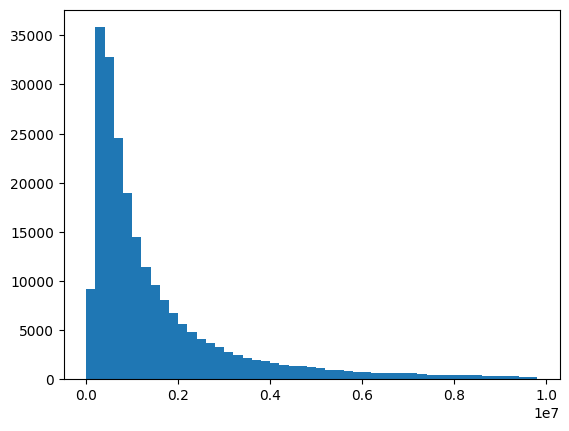

In [45]:
plt.hist(cleaned_newest_us_df['view_count'], bins = np.arange(0, 10_000_000, 200_000));

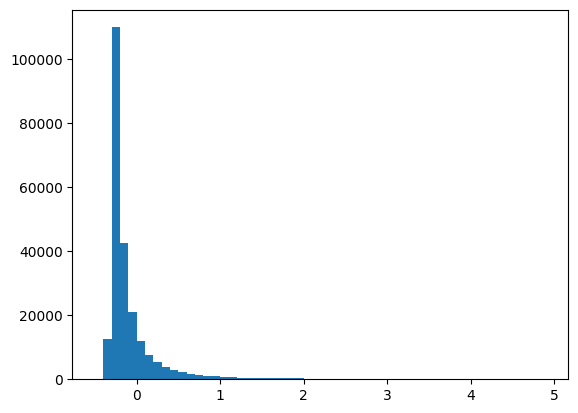

In [52]:
plt.hist(cleaned_newest_us_df['view_count_scaled'], bins = np.arange(-0.5, 5, 0.1)); #, bins = np.arange(0, 10_000_000, 200_000));

-0.3279290918000399